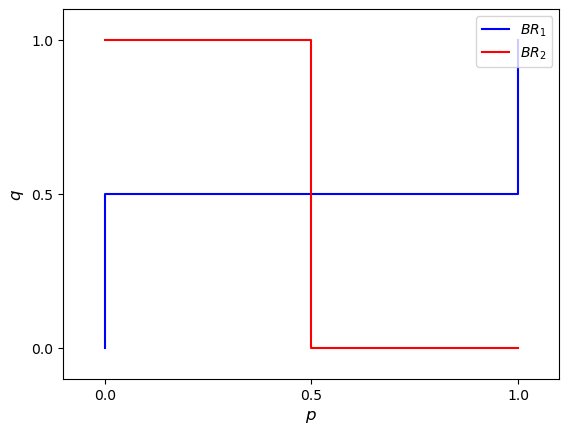

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 创建图表


# 定义折线的数据
# BR1: 蓝色线条
p1 = [0, 0, 1, 1]
q1 = [0, 0.5, 0.5, 1]
# BR2: 红色线条
p2 = [0, 0.5, 0.5, 1]
q2 = [1, 1, 0, 0]
plt.plot(p1, q1, color='blue', label=r'$BR_1$')
plt.plot(p2, q2, color='red', label=r'$BR_2$')

# 设置坐标轴的范围
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# 添加坐标轴标签
plt.xlabel(r'$p$', fontsize=12)
plt.ylabel(r'$q$', fontsize=12)

# 设置刻度值
plt.xticks(np.arange(0, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.5))

# 设置图表外观

# 绘制网格
plt.grid(False)

# 显示图例
plt.legend()

# 显示图表
# plt.savefig('3-2b.png')
plt.show()



In [2]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph()

# 要添加的节点及其标注 (格式：节点名, 辅助标注)
nodes = [('x1', '1'), ('x2', '2'), ('x3', '2'), ('x4', '2'), 
         ('x5', '1,1'), ('x6', '0,2'), ('x7', '0,2'), ('x8', '2,0'), ('x9', '2,0'), ('x10', '1,1')]

# 批量添加带标注的节点
for node_info in nodes:
    _node, xlabel = node_info  # 解包节点名称和辅助标注

    # 添加节点，条件性地加入 xlabel
    if xlabel is not None:  # 确保 xlabel 是字符串
        dot.node(name=_node, label=_node, xlabel=str(xlabel))
    else:
        dot.node(name=_node, label=_node)

# 要添加的边及其标注 (格式：起点, 终点, 标注)
edges = [('x1', 'x2', 'a'), ('x1', 'x3', 'b'), ('x1', 'x4', 'c'),
         ('x2', 'x5', 'b'), ('x2', 'x6', 'c'), 
         ('x3', 'x7', 'c'), ('x3', 'x8', 'a'),
         ('x4', 'x9', 'a'), ('x4', 'x10', 'b')]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 在 Jupyter Notebook 中直接显示
# dot
# dot.render('4-1b', format='png')


In [3]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph()

# 要添加的节点及其标注
nodes = [('x1', '2'), ('x2', '1'), ('x3', '1'), 
         ('x4', None), ('x5', None), ('x6', None), ('x7', None), 
         ('x8', '26,22'), ('x9', '10,10'), ('x10', '10,10'), ('x11', '22,26'),
        ('x12', '36,12'), ('x13', '20,0'),('x14', '20,0'), ('x15', '32,16')]

# 批量添加带标注的节点
for node_info in nodes:
    _node, xlabel = node_info
    if xlabel is not None:
        dot.node(name=_node, label=_node, xlabel=str(xlabel))
    else:
        dot.node(name=_node, label=_node)

# 要添加的边及其标注
edges = [('x1', 'x2', 'S'), ('x1', 'x3', 'G'), 
         ('x2', 'x4', 'O'), ('x2', 'x5', 'F'), ('x3', 'x6', 'O'), ('x3', 'x7', 'F'),
        ('x4', 'x8', 'O'), ('x4', 'x9', 'F'), ('x5', 'x10', 'O'), ('x5', 'x11', 'F'),
        ('x6', 'x12', 'O'), ('x6', 'x13', 'F'), ('x7', 'x14', 'O'), ('x7', 'x15', 'F')]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 创建一个子图以强制节点在同一层
with dot.subgraph() as s:
    s.attr(rank='same')  # 指定相同层次
    # 添加需要在同一层的节点
    s.node('x4')
    s.node('x5')
    s.node('x6')
    s.node('x7')

# 添加无向虚线边
dashed_edges = [('x4', 'x5', '2'), ('x6', 'x7', '2')] 

# 批量添加虚线边
for start, end, label in dashed_edges:
    dot.edge(start, end, label=label, style='dashed', dir='none')

# 在 Jupyter Notebook 中直接显示
# dot
# dot.render('4-4a', format='png')


In [25]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph(engine='neato')  # 使用neato引擎来控制节点位置

# 设置图的全局属性，包括大小
dot.attr(size='10,10', dpi='300')

# 要添加的节点及其标注和坐标
nodes = [
    ('Nature', 'Nature', '0,0'),  # Nature在中间
    ('x2', '1', '0,1'),           # x2在Nature上方
    ('x3', '1', '0,-1'),          # x3在Nature下方
    ('x4', '2', '-1,2'),          # x4在x2左边
    ('x5', '2', '1,2'),           # x5在x2右边
    ('x6', '2', '-1,-2'),         # x6在x3左边
    ('x7', '2', '1,-2'),          # x7在x3右边
    ('x8', '0,4', '-2,3'),        # x8在x4左边
    ('x9', '4,6', '2,3'),         # x9在x5右边
    ('x10', '2,0', '-2,-3'),      # x10在x6左边
    ('x11', '6,-2', '2,-3'),      # x11在x7右边
    ('x12', '-6,3', '-3,4'),      # x12在x8左边
    ('x13', '-2,4', '-1,4'),      # x13在x9左边
    ('x14', '0,-1', '-3,-4'),     # x14在x10左边
    ('x15', '4,-4', '3,-4')      # x15在x11右边
]

# 批量添加带标注的节点并指定坐标
for node_info in nodes:
    _node, xlabel, pos = node_info
    dot.node(name=_node, label='', xlabel=str(xlabel), pos=pos, shape='point')  # 显示为点，标签为空

# 要添加的边及其标注
edges = [('Nature', 'x2', 'E,p'), ('Nature', 'x3', 'G,1-p'), 
         ('x2', 'x4', 'B'), ('x2', 'x5', 'S'), ('x3', 'x6', 'B'), ('x3', 'x7', 'S'),
         ('x4', 'x8', 'L'), ('x4', 'x9', 'H'), ('x5', 'x10', 'L'), ('x5', 'x11', 'H'),
         ('x6', 'x12', 'L'), ('x6', 'x13', 'H'), ('x7', 'x14', 'L'), ('x7', 'x15', 'H')]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 添加无向虚线边
dashed_edges = [('x4', 'x6', None), ('x5', 'x7', None)] 

# 批量添加虚线边
for start, end, label in dashed_edges:
    dot.edge(start, end, label=label, style='dashed', dir='none')

# 在 Jupyter Notebook 中直接显示
dot

# 渲染并保存为 PNG 文件
dot.render('111', format='png')


'111.png'

In [ ]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph()

# 设置图的全局属性，包括大小
dot.attr(size='10,10', dpi='300')

# 要添加的节点及其标注
nodes = [('Nature','Nature'), ('x2', '1'), ('x3', '1'), 
         ('x4', '2'), ('x5', '2'), ('x6', '2'), ('x7', '2'), 
         ('x8', '0,4'), ('x9', '4,6'), ('x10', '2,0'), ('x11', '6,-2'),
        ('x12', '-6,3'), ('x13', '-2,4'),('x14', '0,-1'), ('x15', '4,-4')]

# 批量添加带标注的节点
for node_info in nodes:
    _node, xlabel = node_info
    if xlabel is not None:
        dot.node(name=_node, label='', xlabel=str(xlabel), shape='point')  # 显示为点，标签为空
    else:
        dot.node(name=_node, label='', shape='point')  # 显示为点，标签为空

# 要添加的边及其标注
edges = [('Nature', 'x2', 'E,p'), ('Nature', 'x3', 'G,1-p'), 
         ('x2', 'x4', 'B'), ('x2', 'x5', 'S'), ('x3', 'x6', 'B'), ('x3', 'x7', 'S'),
        ('x4', 'x8', 'L'), ('x4', 'x9', 'H'), ('x5', 'x10', 'L'), ('x5', 'x11', 'H'),
        ('x6', 'x12', 'L'), ('x6', 'x13', 'H'), ('x7', 'x14', 'L'), ('x7', 'x15', 'H')]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 创建一个子图强制节点 x4 和 x6 在同一层
with dot.subgraph() as s:
    s.attr(rank='same')  # 指定相同层次
    s.node('x2')
    s.node('x4')
    s.node('x5')

# 创建另一个子图强制节点 x5 和 x7 在同一层
with dot.subgraph() as s:
    s.attr(rank='same')  # 指定相同层次
    s.node('x3')
    s.node('x6')

# 为了强制 x4 和 x6 在不同层次，或者强制其他节点之间的顺序，
# 可以通过添加不同的子图来实现

# 创建一个子图强制节点 x2 和 x3 在不同层
with dot.subgraph() as s:
    s.attr(rank='min')  # 指定 x2 在更上面的一层
    s.node('x2')

with dot.subgraph() as s:
    s.attr(rank='max')  # 指定 x3 在更下面的一层
    s.node('x3')

# 添加无向虚线边
dashed_edges = [('x4', 'x6', '2'), ('x5', 'x7', '2')] 

# 批量添加虚线边
for start, end, label in dashed_edges:
    dot.edge(start, end, label=label, style='dashed', dir='none')

# 在 Jupyter Notebook 中直接显示
dot

# 渲染并保存为 PNG 文件
dot.render('111', format='png')


'111.png'

In [5]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph()

# 要添加的节点及其标注 (格式：节点名, 辅助标注)
nodes = [('385',None),
         ('91', None), ('100',None), ('194',None),
         ('49', None), ('64', None), ('81', None), 
         ('25', None), ('30', None), ('36', None),
            ('16', None), ('5', None), ('9', None),
            ('4', None), ('1', None)]
# 批量添加带标注的节点
for node_info in nodes:
    _node, xlabel = node_info  # 解包节点名称和辅助标注

    # 添加节点，条件性地加入 xlabel
    if xlabel is not None:  # 确保 xlabel 是字符串
        dot.node(name=_node, label=_node, xlabel=str(xlabel))
    else:
        dot.node(name=_node, label=_node)

# 要添加的边及其标注 (格式：起点, 终点, 标注)
edges = [('385', '91', None), ('385', '100', None), ('385', '194', None),
         ('194', '49', None), ('194', '64', None), ('194', '81', None),
         ('91', '25', None), ('91', '30', None), ('91', '36', None),
         ('30', '5', None), ('30', '9', None), ('30', '16', None),
         ('5', '4', None), ('5', '1', None)]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 在 Jupyter Notebook 中直接显示
# dot
# dot.render('5-5', format='png')


In [6]:
from graphviz import Digraph

# 创建一个有向图
dot = Digraph()

# 要添加的节点及其标注 (格式：节点名, 辅助标注)
nodes = [('A',None), ('B', None), ('C', None), ('D', None),
            ('E', None), ('F', None), ('G', None), ('H', None),
            ('I', None), ('J', None)]
# 批量添加带标注的节点
for node_info in nodes:
    _node, xlabel = node_info  # 解包节点名称和辅助标注

    # 添加节点，条件性地加入 xlabel
    if xlabel is not None:  # 确保 xlabel 是字符串
        dot.node(name=_node, label=_node, xlabel=str(xlabel))
    else:
        dot.node(name=_node, label=_node)

# 要添加的边及其标注 (格式：起点, 终点, 标注)
edges = [('A', 'B', None), ('A', 'C', None), ('A', 'D', None),
            ('B', 'E', None), ('B', 'F', None), ('D', 'G', None),
            ('E', 'H', None), ('E', 'I', None), ('F', 'J', None)]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=label)

# 在 Jupyter Notebook 中直接显示
#dot.render('6-1-1', format='png')


In [7]:
from graphviz import Graph

# 创建一个无向图，并指定布局为 'neato' 以使用坐标
dot = Graph(engine='neato')

# 要添加的节点及其坐标 (格式：节点名, 辅助标注, x 坐标, y 坐标)
nodes = [('A', None, 0, 1), ('B', None, 1, 1), ('C', None, 0, 0), ('D', None, 1, 0)]

# 批量添加带标注的节点，并指定位置
for node_info in nodes:
    _node, xlabel, x, y = node_info  # 解包节点名称、辅助标注和坐标

    # 添加节点，设置位置和标注
    dot.node(name=_node, label=_node, pos=f'{x},{y}!')

# 要添加的边及其标注 (格式：起点, 终点, 标注)
edges = [('A', 'B', 1), ('A', 'C', 3), ('A', 'D', 100),
         ('B', 'C', 100), ('B', 'D', 4), ('C', 'D', 3)]

# 批量添加带标注的边
for start, end, label in edges:
    dot.edge(start, end, label=str(label))

# 在 Jupyter Notebook 中直接显示
# dot.render('7-2-1', format='png')
